In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical # to convert one hot encoding
from keras.optimizers import Adam
import os
print(os.listdir("../input"))
sns.set(style='white', context='notebook', palette='deep')



Using TensorFlow backend.


['train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
#loading data
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')


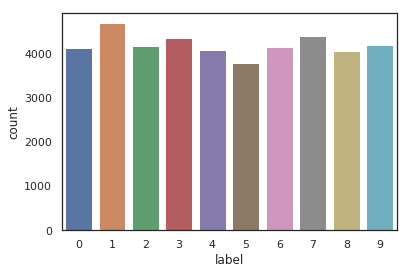

In [3]:
Y_train = train_data['label']
#Y_train.value_counts().plot.bar()
sns.countplot(Y_train)
X_train = train_data.drop('label',axis = 1)
del train_data

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
#Normalisation

X_train = X_train/255.0
test_data = test_data/255.0
type(X_train)

pandas.core.frame.DataFrame

In [7]:
#reshape
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
type(X_train)

numpy.ndarray

In [8]:
#label
Y_train = to_categorical(Y_train,num_classes = 10)

In [9]:
#spliting training and testing data
random_seed = 2
X_train,test_X,Y_train,test_Y = train_test_split(X_train,Y_train,test_size = 0.1,random_state = random_seed)
type(X_train)

numpy.ndarray

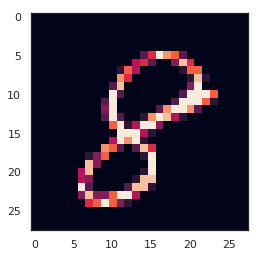

In [10]:
g = plt.imshow(X_train[0][:,:,0])

In [11]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [12]:

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [13]:
model.fit(x = X_train,y = Y_train,batch_size = 100,epochs = 10,validation_data=(test_X,test_Y))

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 4s 112us/step - loss: 0.2328 - acc: 0.9268 - val_loss: 0.0951 - val_acc: 0.9714
Epoch 2/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0622 - acc: 0.9810 - val_loss: 0.0523 - val_acc: 0.9831
Epoch 3/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0405 - acc: 0.9871 - val_loss: 0.0437 - val_acc: 0.9860
Epoch 4/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0441 - val_acc: 0.9876
Epoch 5/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0230 - acc: 0.9927 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 6/10
37800/37800 [==============================] - 2s 50us/step - loss: 0.0188 - acc: 0.9939 - val_loss: 0.0485 - val_acc: 0.9869
Epoch 7/10
37800/37800 [==============================] - 2s 50us/step - loss: 0

In [14]:
result = model.predict(test_data)

In [15]:
results = np.argmax(result,axis = 1)
results

array([2, 0, 9, ..., 3, 9, 2])

In [16]:
Label = pd.Series(results,name = 'Label')
ImageId = pd.Series(range(1,28001),name = 'ImageId')
submission = pd.concat([ImageId,Label],axis = 1)
submission.to_csv('submission.csv',index = False)